# **Business Loan Prediction using DL Models**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  ** Reading the data**

In [4]:
data = pd.read_csv('loan_approval_dataset.csv')

In [6]:
data = pd.DataFrame(data)
data.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [8]:
# COLUMN DETAILS
================
# loan_id: Unique identifier for each loan record.
# no_of_dependents: Number of dependents the borrower has, which can affect loan eligibility.
# education: The education level of the borrower (e.g., Graduate, Not Graduate), which can impact the borrower's creditworthiness.
# self_employed: Indicates whether the borrower is self-employed (Yes/No), which may influence income stability.
# income_annum: The borrower's annual income, which is crucial for assessing repayment capacity.
# loan_amount: The amount of the loan requested by the borrower.
# loan_term: The duration (in years or months) for which the loan is granted.
# cibil_score: The borrower's credit score, a measure of their creditworthiness.
# residential_assets_value: The value of the borrower's residential property/assets.
# commercial_assets_value: The value of any commercial assets owned by the borrower.
# luxury_assets_value: The value of the borrower's luxury assets, which could provide an insight into their financial stability.
# bank_asset_value: The value of assets in the borrower's bank accounts, often used to gauge liquidity.
# loan_status: The status of the loan (e.g., Approved, Rejected), which indicates the outcome of the loan application.

SyntaxError: invalid syntax (727229002.py, line 2)

In [10]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


## **Understanding the Data**

In [15]:
data.shape

(4269, 13)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [21]:
data.columns = data.columns.str.strip()
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [23]:
# How 'education' affects the 'Loan status'?
pd.crosstab(data['education'], data['loan_status'], margins=True)

loan_status,Approved,Rejected,All
education,,,
Graduate,1339,805,2144
Not Graduate,1317,808,2125
All,2656,1613,4269


Education has minimal impact on loan approval, as approval rates for graduates (62.4%) and non-graduates (61.9%) are nearly the same.
Loan approval depends more on other factors like income, CIBIL score, and assets rather than just education level.

In [26]:
# How 'education' affects the 'Loan status'?
pd.crosstab(data['self_employed'], data['loan_status'], margins=True)
#Self-employment status has little impact on loan approval, as approval rates for both groups are almost identical (~62%).

loan_status,Approved,Rejected,All
self_employed,,,
No,1318,801,2119
Yes,1338,812,2150
All,2656,1613,4269


In [28]:
data['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

##  **Data Visualization**
#### **Exploring Some of the Variable by visualizing them.**

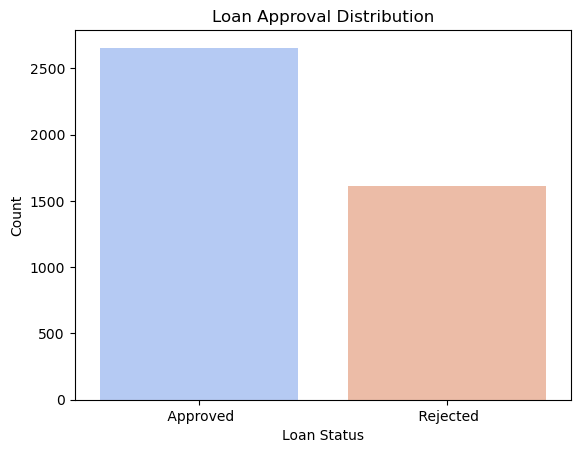

In [31]:
sns.countplot(data=data, x='loan_status', palette='coolwarm')
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

The chart shows a significantly higher number of loan approvals compared to loan rejections.  Specifically, there were approximately 2,600 approved loans and 1,600 rejected loans.

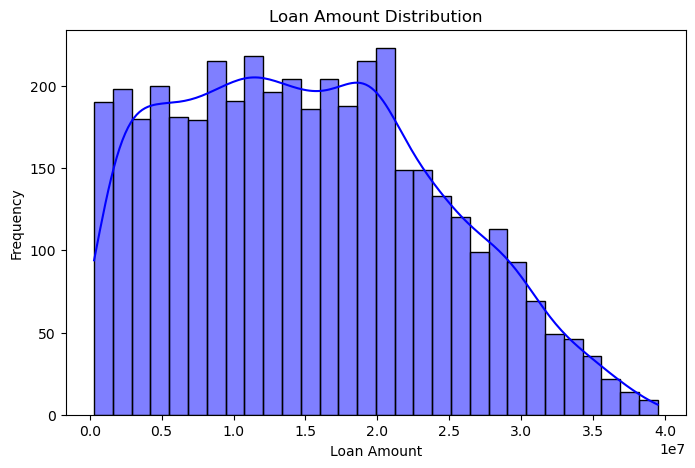

In [34]:
# loan Income distribution, it is rightly skewed histogram. We have to normalize the values.
plt.figure(figsize=(8,5))
sns.histplot(data['loan_amount'], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

 It reveals that the most frequent loan amounts are clustered between 0 and 2 million (units unspecified), with a peak around 1 million.  There's a sharp drop-off in frequency for loan amounts above 2 million, indicating that larger loans are considerably less common.  The distribution appears somewhat skewed to the right.

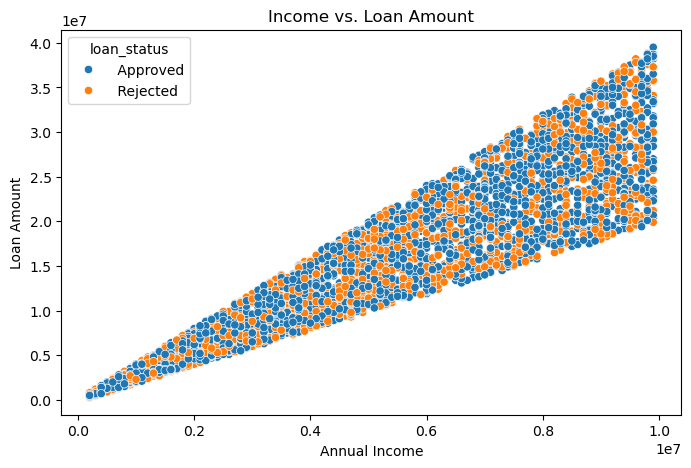

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='income_annum', y='loan_amount', hue='loan_status')
plt.title("Income vs. Loan Amount")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()
#Helps to determine whether higher income leads to larger loans.

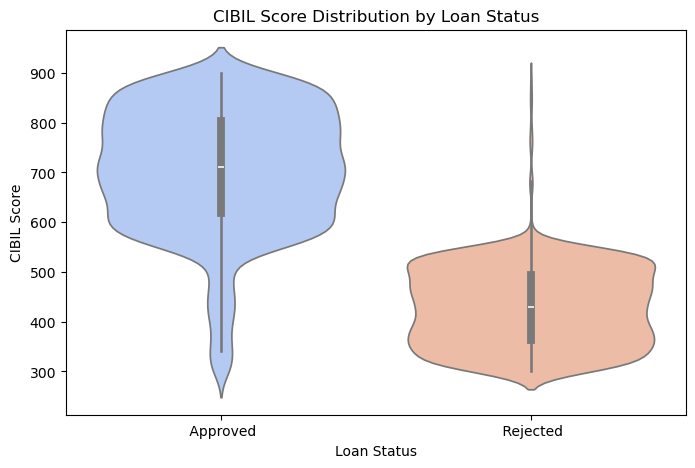

In [39]:
# Violin plot for CIBIL Score based on Loan Status
plt.figure(figsize=(8,5))
sns.violinplot(data=data, x='loan_status', y='cibil_score', palette='coolwarm')
plt.title("CIBIL Score Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Score")
plt.show()

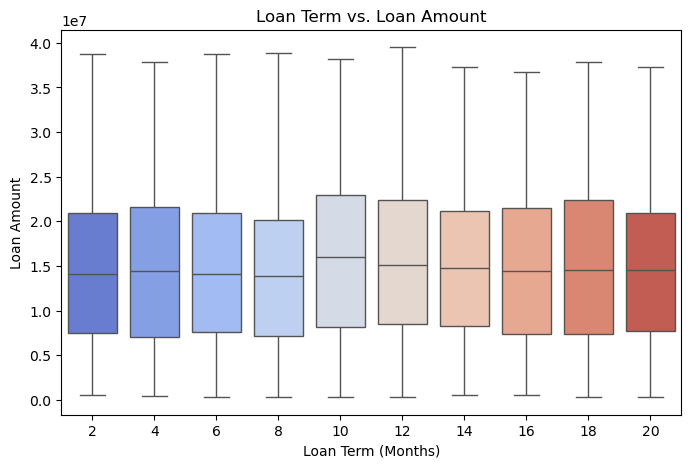

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='loan_term', y='loan_amount', palette='coolwarm')
plt.title("Loan Term vs. Loan Amount")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Loan Amount")
plt.show()
#Helps identify trends in loan term & amount.
#Identifies outliers in loan amounts for different terms

Loan amounts are generally consistent across different loan terms (2-20 months), with a possible slight increase for the longest terms, but no strong correlation is evident.

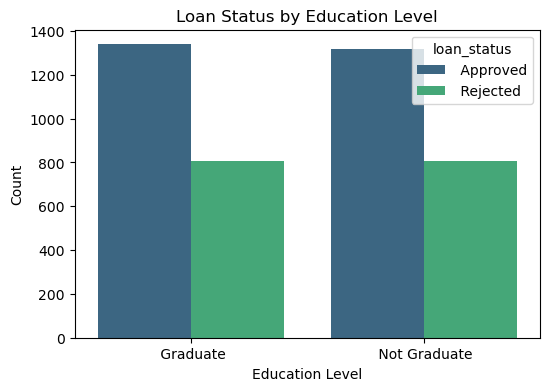

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='education', hue='loan_status', palette='viridis')
plt.title("Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

Graduates have a significantly higher loan approval rate than non-graduates.

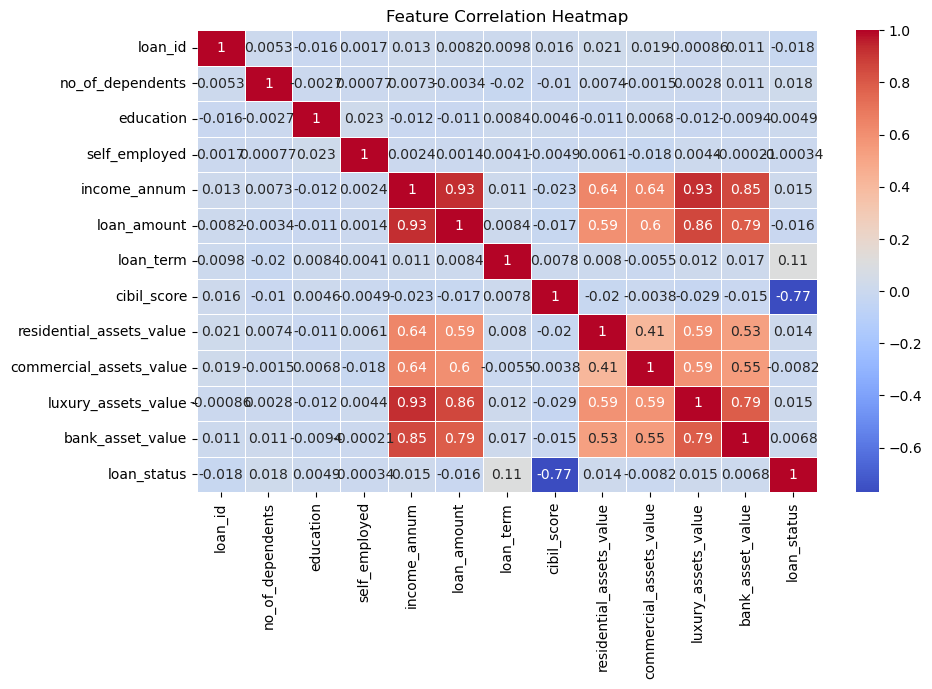

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## **Looking for missing values**

In [50]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

There is no missing values to be handled

In [53]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## **Handling Categorical Columns**

In [56]:
data.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2656,2657,3,Not Graduate,No,3300000,13100000,2,554,6000000,2500000,6700000,3800000,Approved
505,506,4,Graduate,Yes,2000000,7200000,10,838,2500000,300000,7600000,1000000,Approved
2132,2133,0,Graduate,Yes,5900000,15200000,16,399,15200000,3200000,12200000,6500000,Rejected
2095,2096,4,Not Graduate,Yes,7900000,31400000,10,654,16500000,15200000,25400000,5000000,Approved
1661,1662,2,Not Graduate,Yes,3100000,10700000,16,357,9200000,1900000,7700000,3800000,Rejected


## **Encoding**

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
data['education'] = le.fit_transform(data['education'])
data['self_employed'] = le.fit_transform(data['self_employed'])
data['loan_status'] = le.fit_transform(data['loan_status'])

In [61]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


## **Feature Scaling**

In [64]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [66]:
cols = ['income_annum', 'loan_amount','residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
data[cols] = scalar.fit_transform(data[cols])

In [68]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,1.617979,1.633052,12,778,-0.780058,2.877289,0.832028,0.930304,0
1,2,0,1,1,-0.341750,-0.324414,8,417,-0.733924,-0.631921,-0.694993,-0.515936,1
2,3,3,0,0,1.439822,1.610933,20,506,-0.057300,-0.107818,1.996520,2.407316,1
3,4,3,0,0,1.119139,1.721525,8,467,1.649637,-0.381263,0.897943,0.899533,1
4,5,5,1,1,1.689242,1.002681,20,382,0.757724,0.735304,1.568075,0.007172,1


ML algorithm which don't need feature scaling are Non-linear algorithms. like Decision Tree, Random Forest, Gradient Bost, Naive Bayes, etc.

Any algorithm, which is not distance based is not affected by feature scaling.

## **Splitting The Dataset Into The Training Set And Test Set**

# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
X = data.drop(['loan_id', 'loan_status'], axis=1)  # Drop ID column and target
y = data['loan_status']

In [76]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,1.617979,1.633052,12,778,-0.780058,2.877289,0.832028,0.930304
1,0,1,1,-0.341750,-0.324414,8,417,-0.733924,-0.631921,-0.694993,-0.515936
2,3,0,0,1.439822,1.610933,20,506,-0.057300,-0.107818,1.996520,2.407316
3,3,0,0,1.119139,1.721525,8,467,1.649637,-0.381263,0.897943,0.899533
4,5,1,1,1.689242,1.002681,20,382,0.757724,0.735304,1.568075,0.007172


In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


#### **Training multiple models and selecting the one with the highest accuracy for real-world predictions.**

## **Feedforward Neural Network (FNN)**

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [84]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Approved/Rejected)
])

In [86]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5526 - loss: 10.4125 - val_accuracy: 0.6276 - val_loss: 0.5946
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5828 - loss: 1.8076 - val_accuracy: 0.6276 - val_loss: 0.5813
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5914 - loss: 0.9397 - val_accuracy: 0.6276 - val_loss: 0.5608
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6186 - loss: 0.6924 - val_accuracy: 0.6710 - val_loss: 0.5588
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6082 - loss: 0.6472 - val_accuracy: 0.7892 - val_loss: 0.5713
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6460 - loss: 0.5934 - val_accuracy: 0.9239 - val_loss: 0.5916
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6620 - loss: 0.5824 - val_accuracy: 0.7400 - val_loss: 0.5238
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 0.5813 - val_accuracy: 0

In [123]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.4577 
Test Accuracy: 0.7693


## **Multi-Layer Perceptron**

In [90]:
# Define Perceptron Model (MLP)
final_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dense(32, activation='relu'),  # Hidden Layer 1
    Dense(16, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
final_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5987 - loss: 3.8989 - val_accuracy: 0.6639 - val_loss: 0.5090
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5094 - val_accuracy: 0.7810 - val_loss: 0.4551
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7409 - loss: 0.5064 - val_accuracy: 0.6874 - val_loss: 0.5819
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7608 - loss: 0.4827 - val_accuracy: 0.7963 - val_loss: 0.4030
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7936 - loss: 0.4277 - val_accuracy: 0.8150 - val_loss: 0.3848
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.4027 - val_accuracy: 0.8056 - val_loss: 0.3720
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.3932 - val_accuracy: 0.8068 - val_loss: 0.3677
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8177 - loss: 0.3920 - val_accuracy: 0.

In [94]:
# Evaluate the model
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9116 - loss: 0.2355 
Test Accuracy: 0.8981


Selecting Multilayer Perceptron for Production with 91.50 accuracy.

## **Save The Model**
**Before we save our best model Logistic Regression for Production, we've to train our Model on the entire dataset with best parameters that we've just found.**

In [98]:
final_model.fit(X, y)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9022 - loss: 0.2485


**Saving our model, so that we've don't have to train it again using joblib**.

In [102]:
import pickle

# saving our model by passing an instance of our model and giving it a name.

with open("business_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

In [104]:
# Ensure you're loading the correct file
with open("business_model.pkl", "rb") as file:
    business_model = pickle.load(file)

# Check if the model has the `.predict()` method
if not hasattr(business_model, "predict"):
    raise TypeError("Loaded `home_model` is not a valid ML model.")

In [106]:
print("Type of personal_model:", type(business_model))

# Check if it is an actual ML model and has `predict` method
if not hasattr(business_model, "predict"):
    raise TypeError("Loaded `home_model` is not a valid ML model.")

Type of personal_model: <class 'keras.src.models.sequential.Sequential'>


In [108]:
import pandas as pd

df = pd.DataFrame({
    'no_of_dependents': 2, 
    'education': 0, 
    'self_employed': 0, 
    'income_annum':9600000,
    'loan_amount':29900000, 
    'loan_term': 12, 
    'cibil_score': 778, 
    'residential_assets_value':24000000,
    'commercial_assets_value':176000000, 
    'luxury_assets_value':22700000, 
    'bank_asset_value': 8000000
},index=[0])

In [110]:
result = final_model.predict(df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [112]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved
